## Sendy Logistics Challenge

#### Predict the estimated time of arrival (ETA) for motorbike deliveries in Nairobi

**Task**: Predict the time in seconds for Nairobian bike deliveries

**Approach**:

    - Linear Regression (quantitative response)
    - transit_time ~ orders + age + ?

In [8]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno

from lib.preprocessing import *

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [16]:
riders = pd.read_csv("data/riders.csv")
sampsub = pd.read_csv("data/sample_submission.csv")
test = pd.read_csv("data/test.csv")
clean = load_sample(sql_db="data/cleaned_nelson.db")
clean

,index,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Time,...,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Fulfillment - Weekday (Su = 0),Fulfillment - Day of Month
0,1691,Order_No_26720,User_Id_496,Bike,3,Business,30,2,723,12:08:27 PM,...,5,22.755807,-1.255189,36.782203,-1.259295,36.769809,Rider_Id_660,10,2,30
1,2115,Order_No_11555,User_Id_393,Bike,3,Business,11,1,950,3:53:34 PM,...,11,28.900000,-1.316711,36.830156,-1.263818,36.793006,Rider_Id_191,1617,1,11
2,13446,Order_No_3712,User_Id_1280,Bike,3,Business,14,5,652,10:52:36 AM,...,4,21.800000,-1.255189,36.782203,-1.258552,36.794576,Rider_Id_727,354,5,14
3,11510,Order_No_2409,User_Id_3621,Bike,3,Business,9,4,539,9:04:16 AM,...,6,20.973436,-1.283658,36.788601,-1.286268,36.827218,Rider_Id_291,1421,4,9
4,8246,Order_No_12659,User_Id_3354,Bike,3,Business,3,3,667,11:12:26 AM,...,12,24.100000,-1.370038,36.919017,-1.323471,36.849319,Rider_Id_890,975,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,4427,Order_No_17458,User_Id_3283,Bike,3,Business,20,5,646,10:46:57 AM,...,6,18.400000,-1.272828,36.816608,-1.262847,36.781805,Rider_Id_951,766,5,20
2116,6517,Order_No_21042,User_Id_103,Bike,3,Business,27,6,755,12:56:27 PM,...,13,23.283366,-1.290704,36.916412,-1.286553,36.827337,Rider_Id_895,1522,6,27
2117,3749,Order_No_725,User_Id_146,Bike,3,Personal,28,5,748,12:34:00 PM,...,16,25.300000,-1.326545,36.667483,-1.298515,36.787604,Rider_Id_731,2154,5,28
2118,1872,Order_No_14574,User_Id_3091,Bike,3,Business,5,3,714,1:32:04 PM,...,19,25.100000,-1.285991,36.875681,-1.301201,36.764868,Rider_Id_510,2614,3,5


In [10]:
# rename cols-- easier to work with
riders.rename(columns= {
    "Rider Id": "id",
    "No_Of_Orders": "orders",
    "Age": "age",
    "Average_Rating": "average_rating",
    "No_of_Ratings": "number_rating" 
}, inplace=True)

# drop "Rider_Id_" in "id" column
riders.id.replace('Rider_Id_', ' ',regex=True,inplace=True)

rain_mm only includes a handful of observations. Likely to drop. 
temp is missing 20%-- we can use MICE to impute

In [19]:
x = riders[["orders", "age", "average_rating", "number_rating"]]
y = sampsub["transit_time"]

In [21]:
y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

ValueError: Found input variables with inconsistent numbers of samples: [960, 7068]

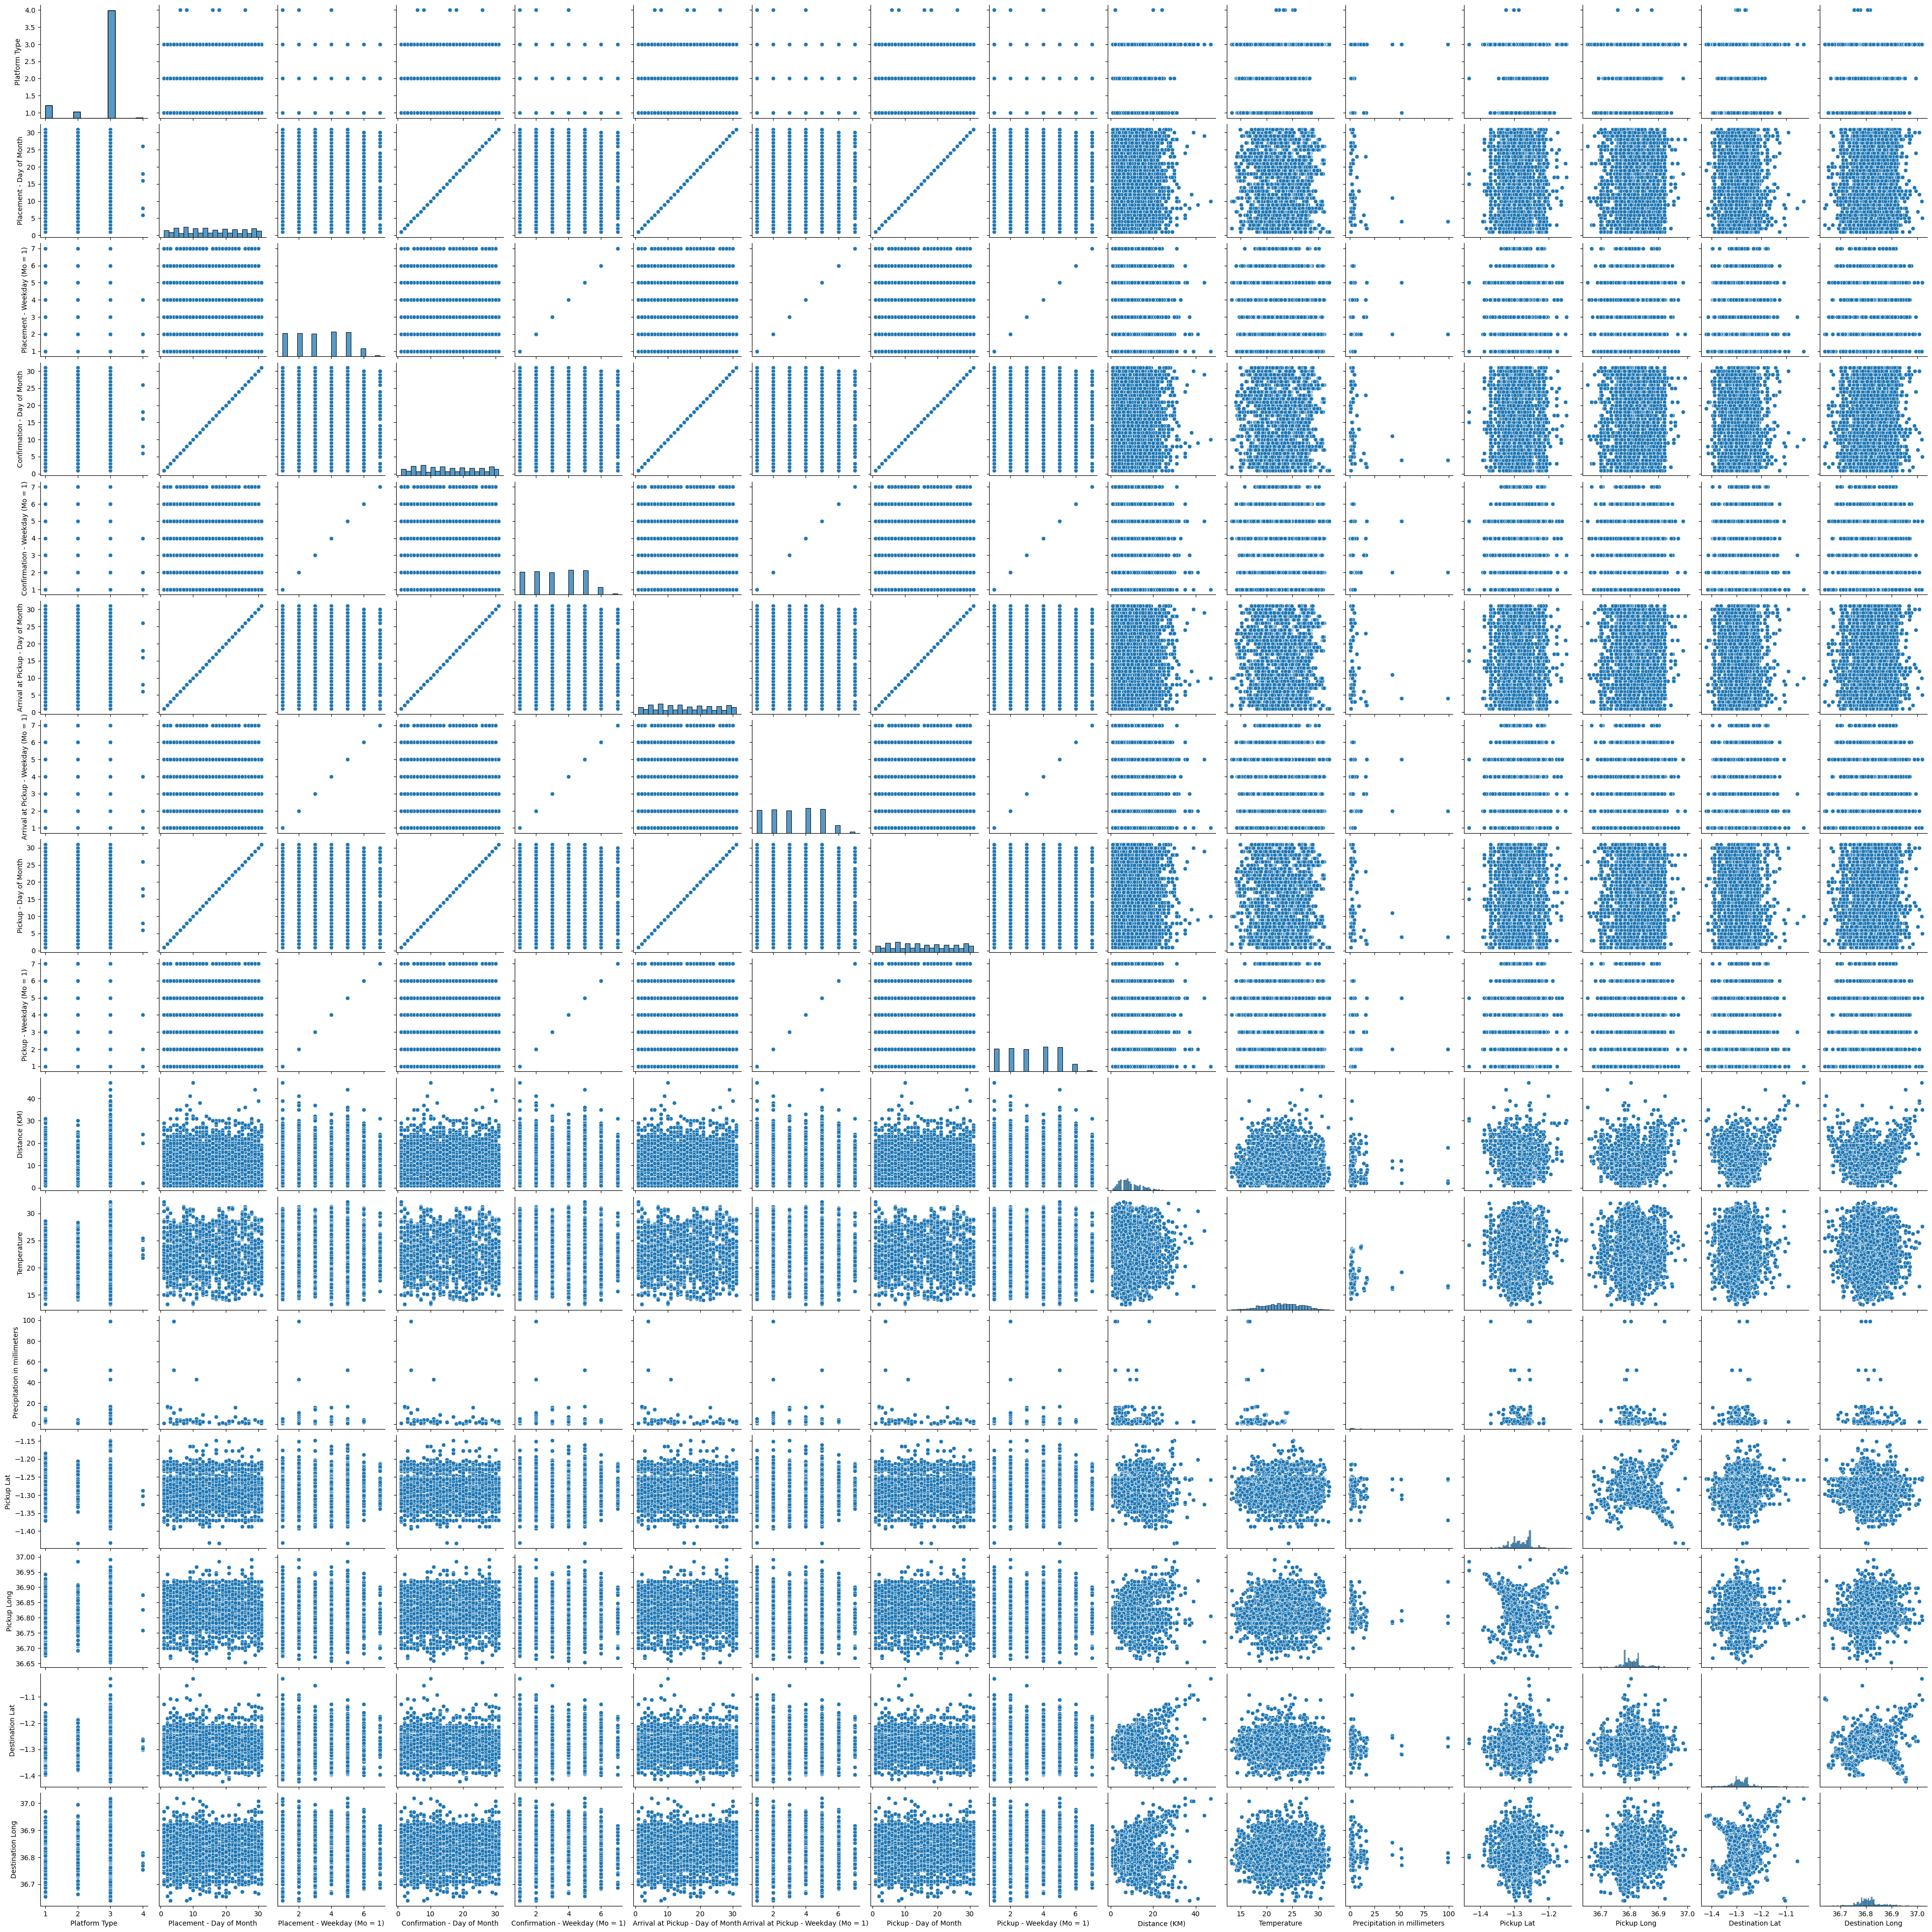

In [4]:
sns.pairplot(test)